In [2]:
# Install necessary libraries
!pip install tomotopy
!pip install little_mallet_wrapper

# Import libraries
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy
import os
import pandas as pd
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Spacy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Import libraries
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import tomotopy as tp



/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Daily Caller publish date list: [datetime.datetime(2024, 2, 26, 0, 0), datetime.datetime(2024, 2, 27, 0, 0), datetime.datetime(2024, 3, 7, 0, 0), datetime.datetime(2024, 2, 28, 0, 0), datetime.datetime(2024, 2, 27, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 2, 29, 0, 0), datetime.datetime(2024, 2, 23, 0, 0), datetime.datetime(2024, 2, 26, 0, 0), datetime.datetime(2024, 3, 4, 0, 0), datetime.datetime(2024, 2, 29, 0, 0), datetime.datetime(2024, 3, 3, 0, 0), datetime.datetime(2024, 3, 6, 0, 0), datetime.datetime(2024, 2, 28, 0, 0), datetime.datetime(2024, 2, 27, 0, 0), datetime.datetime(2024, 2, 22, 0, 0), datetime.datetime(2024, 2, 26, 0, 0), datetime.datetime(2024, 3, 4, 0, 0), datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 3, 0, 0), datetime.datetime(2024, 2, 29, 0, 0), datetime.datetime(2024, 2, 26, 0, 0), datetime.datetime(2024, 2, 28, 0, 0), datetime.datetime(2024, 2, 29, 0, 0), datetime.datetime(2024, 2, 25, 0, 0), datetime.datetime(2024, 3

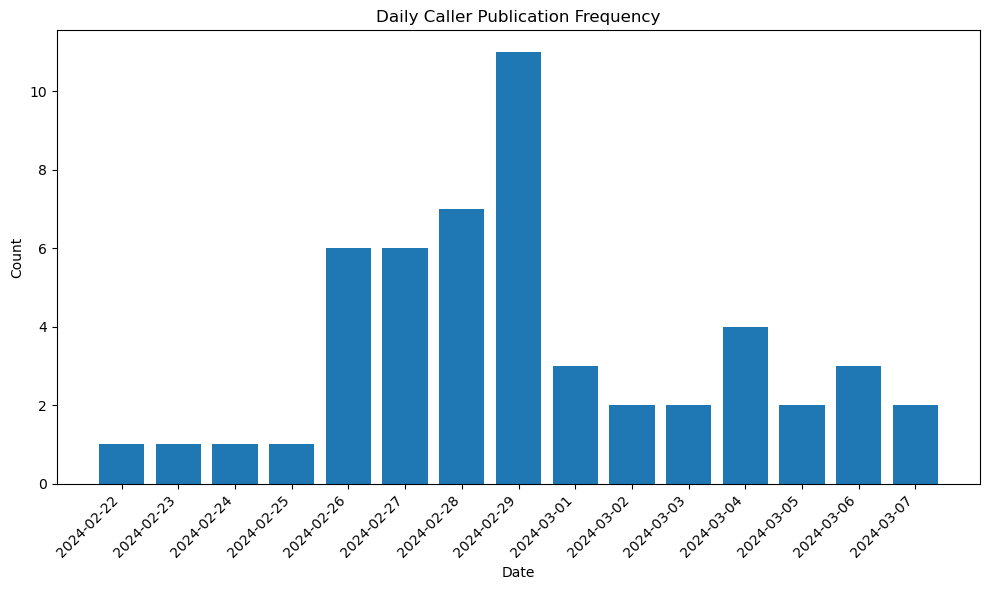

In [2]:
import os
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

# Define a function to extract publish dates
def extract_publish_dates_daily_caller(folder_path):
    publish_dates = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                soup = BeautifulSoup(file, 'html.parser')
                publish_date_tag = soup.find('span', class_='block')
                if publish_date_tag:
                    publish_date_str = publish_date_tag.text.strip()
                    try:
                        publish_date = datetime.strptime(publish_date_str, '%B %d, %Y')
                        publish_dates.append(publish_date)
                    except ValueError:
                        print("Unable to parse date:", publish_date_str)
    return publish_dates

# Process the Daily Caller folder
folder_path_daily_caller = "/Users/macbook/Downloads/Thesis/Dataset/Daily Caller"
publish_dates_daily_caller = extract_publish_dates_daily_caller(folder_path_daily_caller)
print("Daily Caller publish date list:", publish_dates_daily_caller)

# Count the occurrences of each date
date_counter_daily_caller = Counter(publish_dates_daily_caller)

# Separate dates and frequencies
dates_daily_caller, frequencies_daily_caller = zip(*date_counter_daily_caller.items())

# Sort the dates
sorted_indices_daily_caller = sorted(range(len(dates_daily_caller)), key=lambda i: dates_daily_caller[i])
sorted_dates_daily_caller = [dates_daily_caller[i] for i in sorted_indices_daily_caller]
sorted_frequencies_daily_caller = [frequencies_daily_caller[i] for i in sorted_indices_daily_caller]

# Convert dates to string format
dates_str_daily_caller = [f"{date.strftime('%Y-%m-%d')}" for date in sorted_dates_daily_caller]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(dates_str_daily_caller, sorted_frequencies_daily_caller)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Caller Publication Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as JPG
plt.savefig('/Users/macbook/Downloads/Thesis/Daily_Caller_Frequency.jpg')

plt.show()


In [166]:
# Update the stopwords list
extra_stopwords = {'ad', 'story', 'said', 'nt','u', 'et','caller', 'daily', 'tag'}
stop_words = set(stopwords.words('english'))
stop_words.update(extra_stopwords)

# Define function to read text data
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

# Define text preprocessing function
def preprocess_text(text):
    # Remove special characters and punctuation
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    clean_text = clean_text.lower()
    # Tokenize the text
    tokens = word_tokenize(clean_text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Use Spacy for POS tagging and named entity recognition
    doc = nlp(" ".join(filtered_tokens))
    # Remove person names and geopolitical entities
    filtered_tokens = [token.text for token in doc if token.ent_type_ not in {'PERSON', 'GPE'}]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Return the preprocessed text
    return lemmatized_tokens

# Specify the folder containing text files
txt_folder = "/Users/macbook/Downloads/Thesis/Dataset/DC_TXT"
txt_files = [os.path.join(txt_folder, file) for file in os.listdir(txt_folder) if file.endswith(".txt")]

# Preprocess the text data
training_data = []
for file_path in txt_files:
    text = read_text(file_path)
    processed_text = preprocess_text(text)
    training_data.append(" ".join(processed_text))




In [167]:
# Define the number of topics
num_topics = 5

# Create an LDA model
lda_model = tp.LDAModel(k=num_topics)

# Add the preprocessed data to the LDA model
for text in training_data:
    lda_model.add_doc(text.split())

# Train the model
lda_model.train(0)
num_iters = 8
for i in range(num_iters):
    lda_model.train(1)
    print('Iteration: {:d} Log-likelihood: {:.3f}'.format(i, lda_model.ll_per_word))


Iteration: 0 Log-likelihood: -9.240
Iteration: 1 Log-likelihood: -8.930
Iteration: 2 Log-likelihood: -8.744
Iteration: 3 Log-likelihood: -8.622
Iteration: 4 Log-likelihood: -8.545
Iteration: 5 Log-likelihood: -8.463
Iteration: 6 Log-likelihood: -8.401
Iteration: 7 Log-likelihood: -8.370


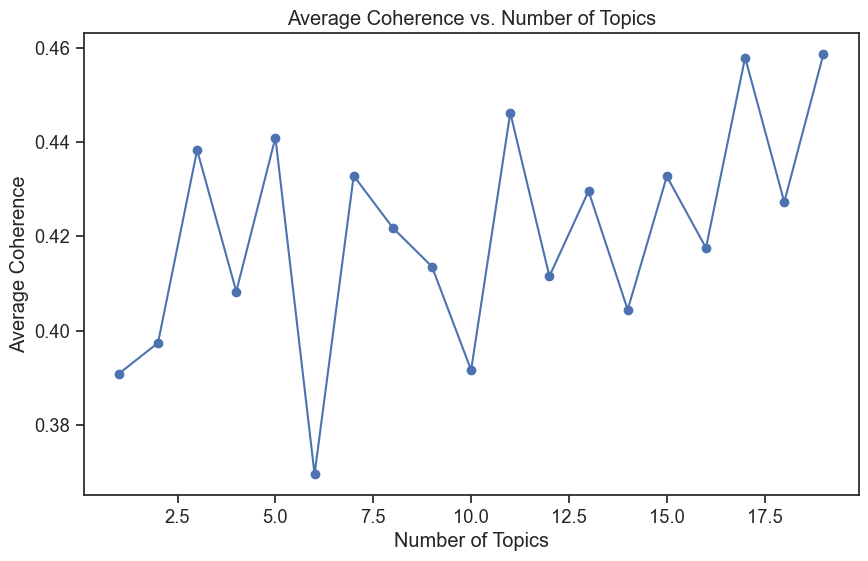

In [160]:
import matplotlib.pyplot as plt

def plot_coherence(num_topics_range, coherence_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_range, coherence_scores, marker='o', linestyle='-')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.show()
    
# Initialize lists to store coherence scores
coherence_scores = []

# Iterate over different number of topics 
for num_topics in range(1, 20, 1):
    # Create a new LDA model
    new_lda_model = tp.LDAModel(k=num_topics)
    for text in training_data:
        new_lda_model.add_doc(text.split())

    # Train the new model
    new_lda_model.train(0) 
    num_iters = 10
    for i in range(num_iters):
        new_lda_model.train(1)

    # Calculate coherence score for the new model
    coh = tp.coherence.Coherence(new_lda_model, coherence='c_v')
    average_coherence = coh.get_score()
    coherence_scores.append(average_coherence)

# Plot the coherence scores
plot_coherence(range(1, 20), coherence_scores)


In [168]:
# Function to print the top words for each topic
def print_top_words(model, num_words=10):
    print("\nTopic Model Results:\n")
    for i in range(model.k):
        print(f"Topic {i + 1}: ", end='')
        topic_words = ' '.join(word for word, _ in model.get_topic_words(i, top_n=num_words) if word not in stop_words)

        print(topic_words)
        print()

# Print the top words for each topic
print_top_words(lda_model, num_words=10)


Topic Model Results:

Topic 1: immigration border country news american migrant font across

Topic 2: border illegal president riley murder student trump crime told house

Topic 3: border year fiscal patrol encounter migrant federal southern biden national

Topic 4: biden border would state president need yearold security law

Topic 5: border crisis policy southern bidens issue fox question immigrant visit



In [163]:
# Function to print the top words for each topic
def print_top_words(model, num_words=10):
    print("\nTopic Model Results:\n")
    for i in range(model.k):
        print(f"Topic {i + 1}: ", end='')
        topic_words = ' '.join(word for word, _ in model.get_topic_words(i, top_n=num_words) if word not in stop_words)

        print(topic_words)
        print()

# Print the top words for each topic
print_top_words(lda_model, num_words=10)


Topic Model Results:

Topic 1: border president security trump policy patrol bidens state visit senate

Topic 2: would fiscal country southern year border american immigrant secure foundation

Topic 3: state people administration republican law fox year biden enforcement

Topic 4: immigration border illegal immigrant million policy biden government news number

Topic 5: border migrant illegal biden crisis news issue related city



/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/xf/6ycp67hx6cn7njl4kht95x5r0000gn/T/ipykernel_1464/2130712865.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


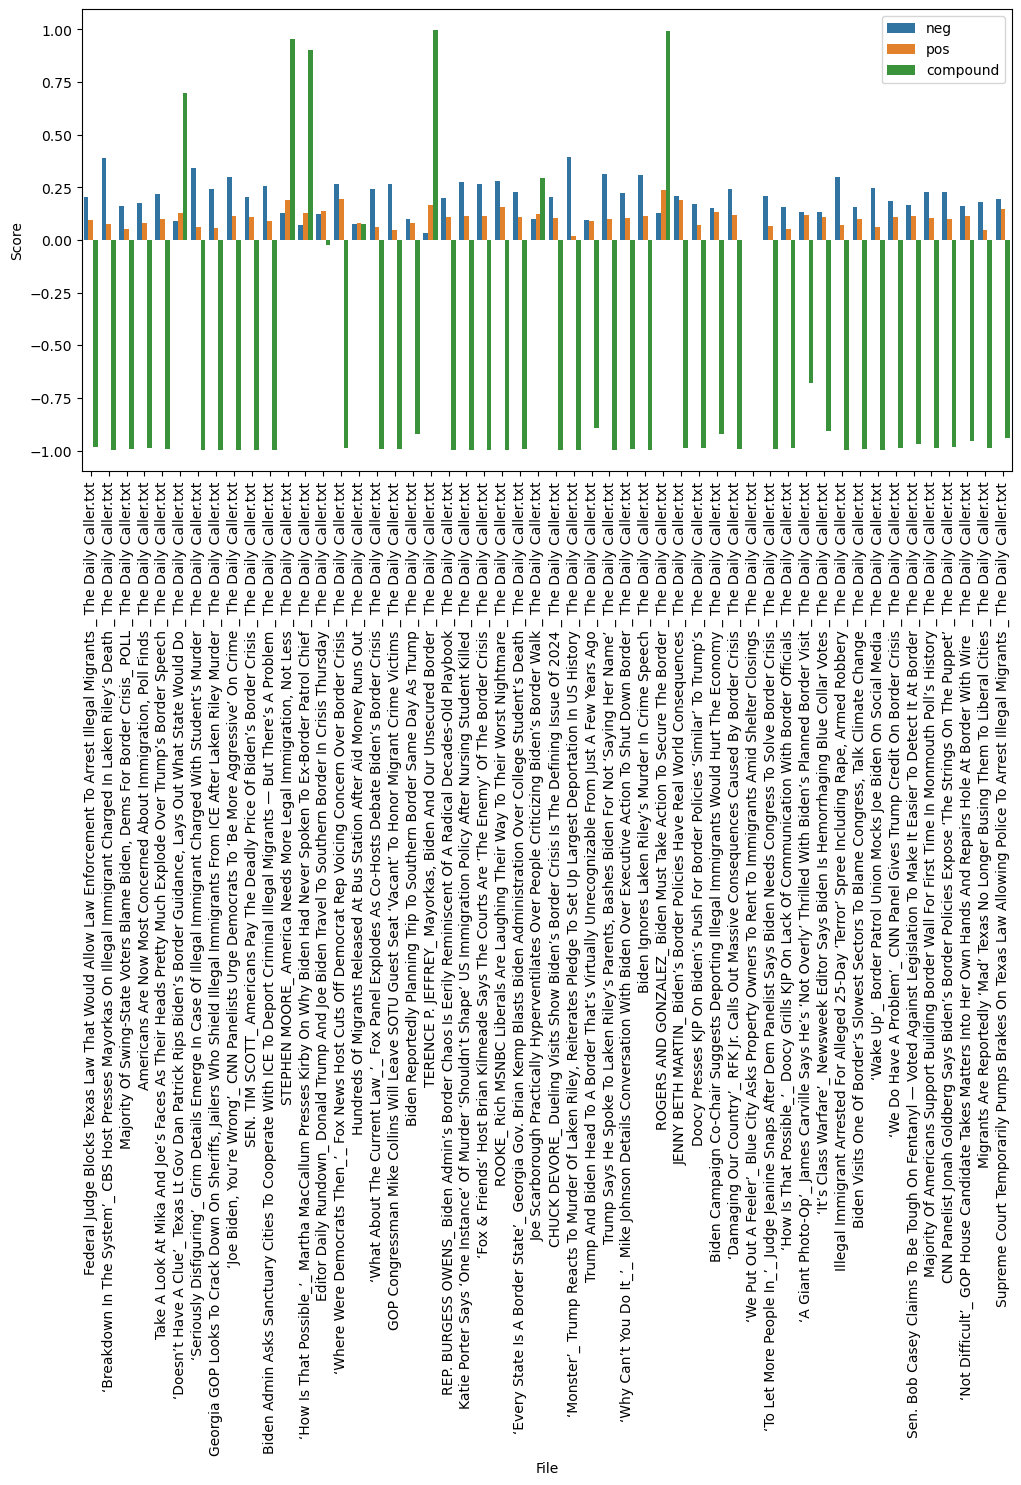

In [1]:
import os
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# Update stopwords list
extra_stopwords = {'ad', 'story', 'said', 'nt'}
stop_words = set(stopwords.words('english'))
stop_words.update(extra_stopwords)

# Function to read text data from a file
def read_text(file_path):
    with open(file_path, 'r', encoding='latin-1') as f:
        text = f.read()
    return text

# Function for text preprocessing
def preprocess_text(text):
    # Remove "Share" and "Post" labels and their subsequent content
    text = re.split(r'\s+Share\s+Post\s+', text)[0]
    # Remove special characters and punctuation
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    clean_text = clean_text.lower()
    # Tokenize text
    tokens = word_tokenize(clean_text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Use Spacy for POS tagging and NER
    doc = nlp(" ".join(filtered_tokens))
    # Remove names and geographical names
    filtered_tokens = [token.text for token in doc if token.ent_type_ not in {'PERSON', 'GPE'}]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Specify the folder containing text files
txt_folder = "/Users/macbook/Downloads/Thesis/Dataset/DC_TXT"
txt_files = [os.path.join(txt_folder, file) for file in os.listdir(txt_folder) if file.endswith(".txt")]

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Preprocess text data and perform sentiment analysis
results = []
for file_path in txt_files:
    text = read_text(file_path)
    processed_text = preprocess_text(text)
    sentiment_scores = sia.polarity_scores(processed_text)
    sentiment_scores['file'] = os.path.basename(file_path)
    results.append(sentiment_scores)

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Visualize sentiment scores
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='file', value_vars=['neg', 'pos', 'compound'], var_name='Sentiment', value_name='Score')
sns.barplot(data=df_melted, x='file', y='Score', hue='Sentiment')
plt.xticks(rotation=90)

plt.xlabel('File')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [4]:
positive_documents = df[df['compound'] > 0.05]['file'].tolist()
print("compound score > 0.05 ：")
for document in positive_documents:
    print(document)
    

compound score > 0.05 ：
‘Doesn’t Have A Clue’_ Texas Lt Gov Dan Patrick Rips Biden’s Border Guidance, Lays Out What State Would Do _ The Daily Caller.txt
STEPHEN MOORE_ America Needs More Legal Immigration, Not Less _ The Daily Caller.txt
‘How Is That Possible_’_ Martha MacCallum Presses Kirby On Why Biden Had Never Spoken To Ex-Border Patrol Chief _ The Daily Caller.txt
Hundreds Of Migrants Released At Bus Station After Aid Money Runs Out _ The Daily Caller.txt
TERENCE P. JEFFREY_ Mayorkas, Biden And Our Unsecured Border _ The Daily Caller.txt
Joe Scarborough Practically Hyperventilates Over People Criticizing Biden’s Border Walk _ The Daily Caller.txt
ROGERS AND GONZALEZ_ Biden Must Take Action To Secure The Border _ The Daily Caller.txt


In [5]:
import os
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from urllib.parse import urlparse  # Importing urlparse function

# Download NLTK data (required for the first run)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

def preprocess_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Return the preprocessed text
    return ' '.join(lemmatized_tokens)

def analyze_html_files(folder_path):
    # Create a sentiment analyzer
    sentiment_analyzer = SentimentIntensityAnalyzer()

    # Record media references
    media_references = {}

    # Iterate through each HTML file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".html"):
            file_path = os.path.join(folder_path, filename)
           
            # Read the content of the HTML file
            with open(file_path, 'r', encoding='utf-8') as f:
                html_content = f.read()

            # Parse HTML using BeautifulSoup
            soup = BeautifulSoup(html_content, 'html.parser')

            # Extract article content (example, extract based on HTML structure)
            article_paragraphs = soup.find_all('p')
            article_text = '\n'.join([p.text for p in article_paragraphs])

            # Text preprocessing
            preprocessed_text = preprocess_text(article_text)

            # Perform word frequency analysis
            word_freq = FreqDist(preprocessed_text.split())

            # Perform sentiment analysis
            sentiment_scores = sentiment_analyzer.polarity_scores(article_text)

            # Extract embedded references (links)
            anchor_tags = soup.find_all('a')
            for tag in anchor_tags:
                href = tag.get('href')
                if href and href.startswith("http"):  # Keep only external links
                    domain = urlparse(href).netloc
                    if domain not in media_references:
                        media_references[domain] = {
                            'count': 0,
                            'sentiment_scores': []
                        }
                    media_references[domain]['count'] += 1
                    media_references[domain]['sentiment_scores'].append(sentiment_scores['compound'])

    # Print media reference statistics
    print("Media References:")
    for domain, info in media_references.items():
        print(f"Domain: {domain}")
        print(f"Total References: {info['count']}")
        if info['sentiment_scores']:
            avg_sentiment = sum(info['sentiment_scores']) / len(info['sentiment_scores'])
            print(f"Average Sentiment: {avg_sentiment:.2f}")
        print("---")

# Specify the folder containing HTML files
folder_path = "/Users/macbook/Downloads/Thesis/Dataset/Daily Caller copy"

# Call the function to perform analysis
analyze_html_files(folder_path)


[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Media References:
Domain: dailycaller.com
Total References: 5680
Average Sentiment: -0.66
---
Domain: store.dailycaller.com
Total References: 162
Average Sentiment: -0.65
---
Domain: dynamic-cdn.openweb.com
Total References: 160
Average Sentiment: -0.66
---
Domain: medicosmetica.com
Total References: 83
Average Sentiment: -0.71
---
Domain: go.safetechtips.com
Total References: 97
Average Sentiment: -0.65
---
Domain: web.expertmarket.com
Total References: 79
Average Sentiment: -0.73
---
Domain: www.outbrain.com
Total References: 513
Average Sentiment: -0.65
---
Domain: www.science-a2z.com
Total References: 55
Average Sentiment: -0.86
---
Domain: www.daily-choices.com
Total References: 93
Average Sentiment: -0.71
---
Domain: mx.investing.com
Total References: 6
Average Sentiment: -0.96
---
Domain: za.investing.com
Total References: 263
Average Sentiment: -0.65
---
Domain: www.facebook.com
Total References: 108
Average Sentiment: -0.65
---
Domain: twitter.com
Total References: 122
Average

/var/folders/xf/6ycp67hx6cn7njl4kht95x5r0000gn/T/ipykernel_19796/2220984254.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(domains, rotation=90)


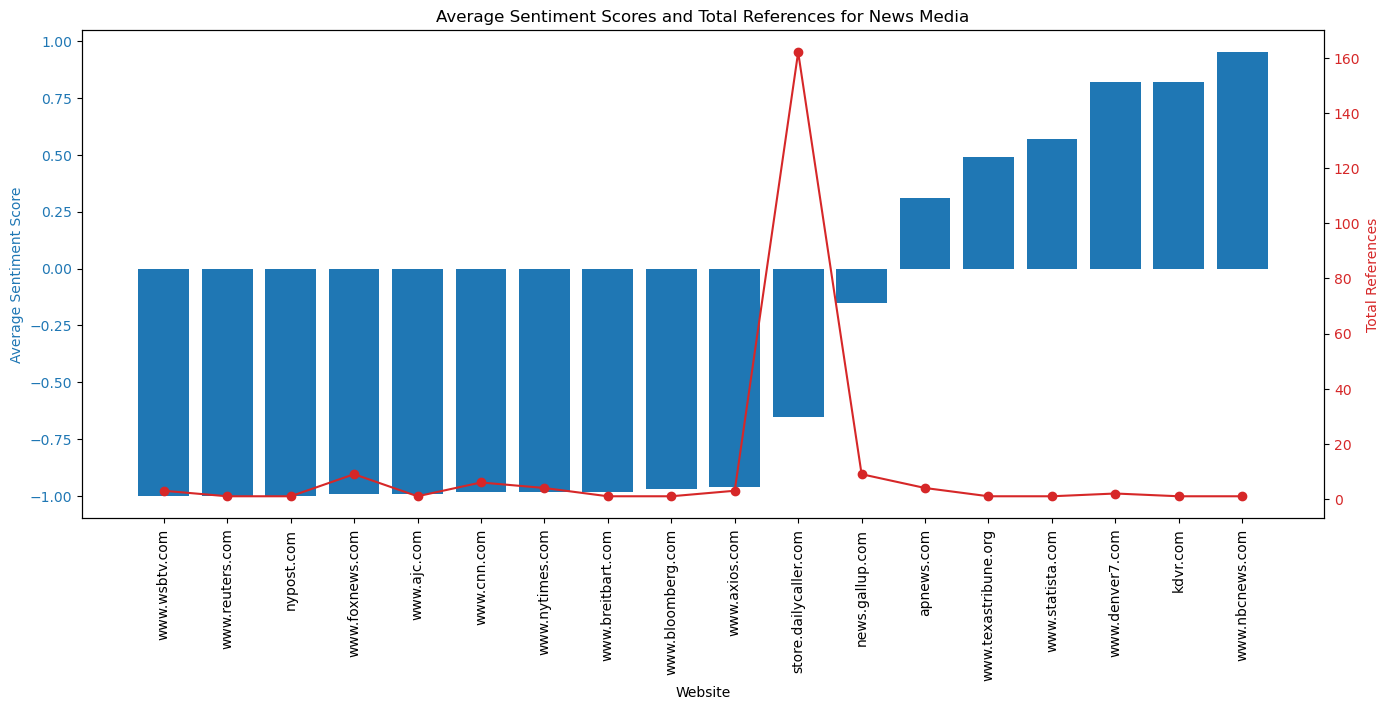

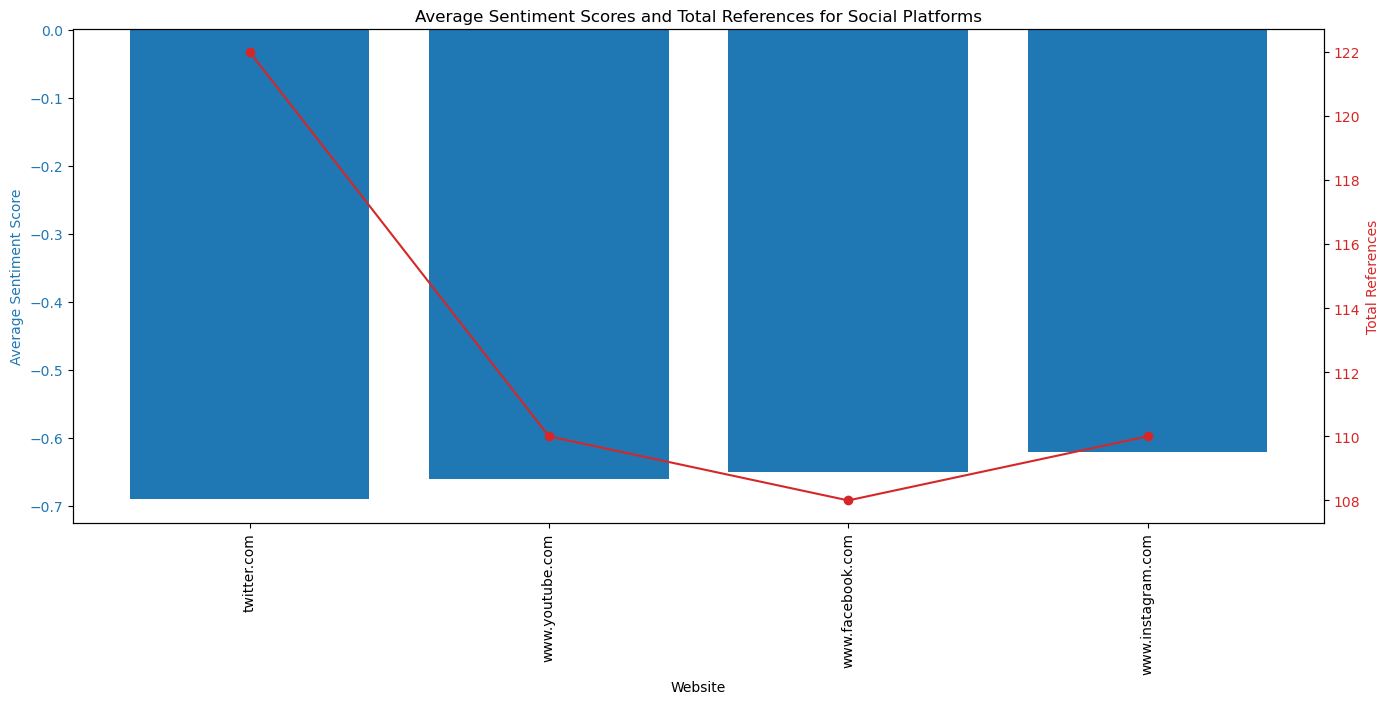

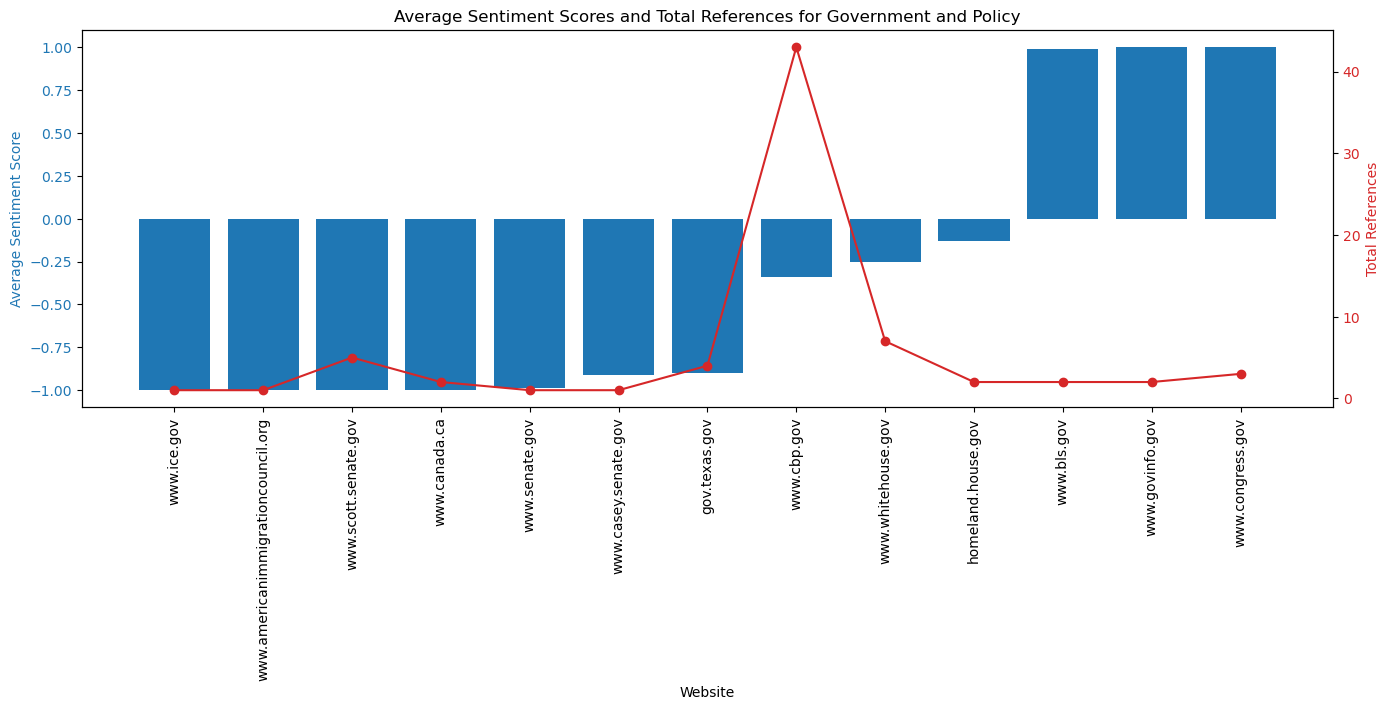

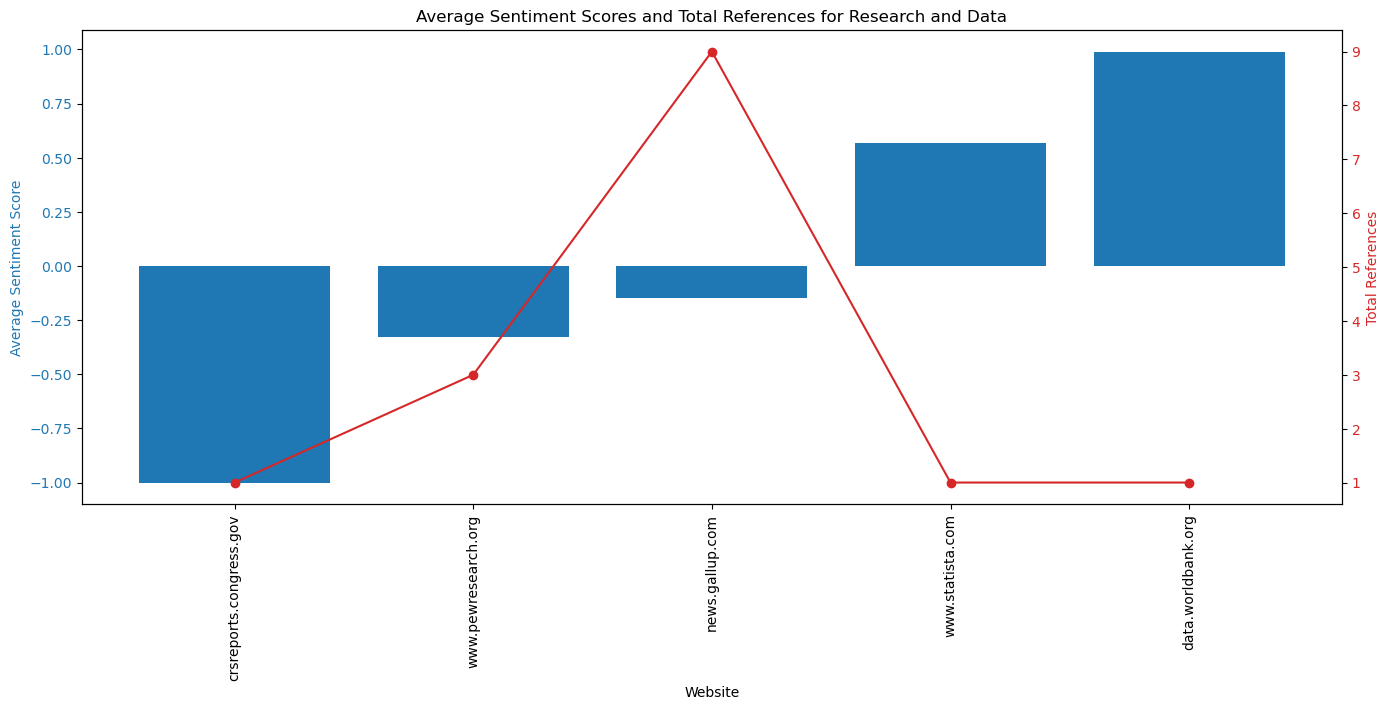

In [6]:
import matplotlib.pyplot as plt

# Data definition
data = {
    "News Media": {
        "store.dailycaller.com": {"sentiment": -0.65, "references": 162},
        "www.wsbtv.com": {"sentiment": -1.00, "references": 3},
        "www.foxnews.com": {"sentiment": -0.99, "references": 9},
        "www.denver7.com": {"sentiment": 0.82, "references": 2},
        "kdvr.com": {"sentiment": 0.82, "references": 1},
        "apnews.com": {"sentiment": 0.31, "references": 4},
        "www.axios.com": {"sentiment": -0.96, "references": 3},
        "www.cnn.com": {"sentiment": -0.98, "references": 6},
        "news.gallup.com": {"sentiment": -0.15, "references": 9},
        "www.statista.com": {"sentiment": 0.57, "references": 1},
        "www.nytimes.com": {"sentiment": -0.98, "references": 4},
        "www.breitbart.com": {"sentiment": -0.98, "references": 1},
        "www.texastribune.org": {"sentiment": 0.49, "references": 1},
        "www.bloomberg.com": {"sentiment": -0.97, "references": 1},
        "www.reuters.com": {"sentiment": -1.00, "references": 1},
        "nypost.com": {"sentiment": -1.00, "references": 1},
        "www.ajc.com": {"sentiment": -0.99, "references": 1},
        "www.nbcnews.com": {"sentiment": 0.95, "references": 1},
    },
    "Social Platforms": {
        "www.facebook.com": {"sentiment": -0.65, "references": 108},
        "twitter.com": {"sentiment": -0.69, "references": 122},
        "www.instagram.com": {"sentiment": -0.62, "references": 110},
        "www.youtube.com": {"sentiment": -0.66, "references": 110},
    },
    "Government and Policy": {
        "www.cbp.gov": {"sentiment": -0.34, "references": 43},
        "gov.texas.gov": {"sentiment": -0.90, "references": 4},
        "homeland.house.gov": {"sentiment": -0.13, "references": 2},
        "www.whitehouse.gov": {"sentiment": -0.25, "references": 7},
        "www.bls.gov": {"sentiment": 0.99, "references": 2},
        "www.senate.gov": {"sentiment": -0.99, "references": 1},
        "www.govinfo.gov": {"sentiment": 1.00, "references": 2},
        "www.congress.gov": {"sentiment": 1.00, "references": 3},
        "www.ice.gov": {"sentiment": -1.00, "references": 1},
        "www.americanimmigrationcouncil.org": {"sentiment": -1.00, "references": 1},
        "www.casey.senate.gov": {"sentiment": -0.91, "references": 1},
        "www.scott.senate.gov": {"sentiment": -1.00, "references": 5},
        "www.canada.ca": {"sentiment": -1.00, "references": 2},
    },
    "Research and Data": {
        "news.gallup.com": {"sentiment": -0.15, "references": 9},
        "www.statista.com": {"sentiment": 0.57, "references": 1},
        "crsreports.congress.gov": {"sentiment": -1.00, "references": 1},
        "www.pewresearch.org": {"sentiment": -0.33, "references": 3},
        "data.worldbank.org": {"sentiment": 0.99, "references": 1},
    }
}

# Function to plot sentiment and references
def plot_sentiment_and_references(data, category_name):
    category_data = data[category_name]
    domains = list(category_data.keys())
    sentiments = [category_data[domain]["sentiment"] for domain in domains]
    references = [category_data[domain]["references"] for domain in domains]
    
    # Sort by sentiment score
    sorted_indices = sorted(range(len(sentiments)), key=lambda k: sentiments[k])
    domains = [domains[i] for i in sorted_indices]
    sentiments = [sentiments[i] for i in sorted_indices]
    references = [references[i] for i in sorted_indices]
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    color = 'tab:blue'
    ax1.set_xlabel('Website')
    ax1.set_ylabel('Average Sentiment Score', color=color)
    ax1.bar(domains, sentiments, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(domains, rotation=90)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Total References', color=color)
    ax2.plot(domains, references, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.title(f'Average Sentiment Scores and Total References for {category_name}')
    plt.show()

# Plot for each category
for category in data:
    plot_sentiment_and_references(data, category)
